## [作業重點]
使用 Sklearn 中的 Lasso, Ridge 模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義。

機器學習的模型非常多種，但要訓練的資料多半有固定的格式，確保你了解訓練資料的格式為何，這樣在應用新模型時，就能夠最快的上手開始訓練！

## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則化來觀察訓練情形。

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
plt.style.use('seaborn')

wine = datasets.load_wine()
boston = datasets.load_boston()
breast_cancer = datasets.load_breast_cancer()

### 選擇迴歸問題的 boston 資料集

In [2]:
boston # 觀察資較和目標值，判斷是迴歸問題

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
boston.data.shape # 資料總共有 506 筆，13 個特徵

(506, 13)

#### Adding Features
> 原本只有 13 個特徵，但效果不太好（甚至是 underfitting），所以將特徵做交乘。只是這樣做會有重複的交乘項。

In [28]:
data = boston.data
add_raw = np.empty((data.shape[0], data.shape[1] ** 2))
print(f'before adding features: {data.shape}')
for i in range(data.shape[0]):
    add_raw[i, :] = np.outer(data[i, :], data[i, :]).flatten()
data = np.concatenate((data, add_raw), axis = 1)
print(f'after adding features: {data.shape}')

before adding features: (506, 13)
after adding features: (506, 182)


#### Normalization

In [29]:
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
for i in range(data.shape[1]):
    for j in range(data.shape[0]):
        if std[i] != 0:
            data[j, i] = (data[j, i] - mean[i]) / std[i]
data

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.11967794,
        -0.88025024, -0.78952949],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.52585771,
        -0.24786578, -0.54045362],
       [-0.41734159, -0.48772236, -0.59338101, ..., -1.15029643,
        -1.03094709, -0.82582493],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ..., -0.82965355,
        -0.77992002, -0.7598079 ],
       [-0.40776407, -0.48772236,  0.11573841, ..., -0.70855261,
        -0.66078951, -0.71663755],
       [-0.41500016, -0.48772236,  0.11573841, ..., -0.50671772,
        -0.43940531, -0.63138918]])

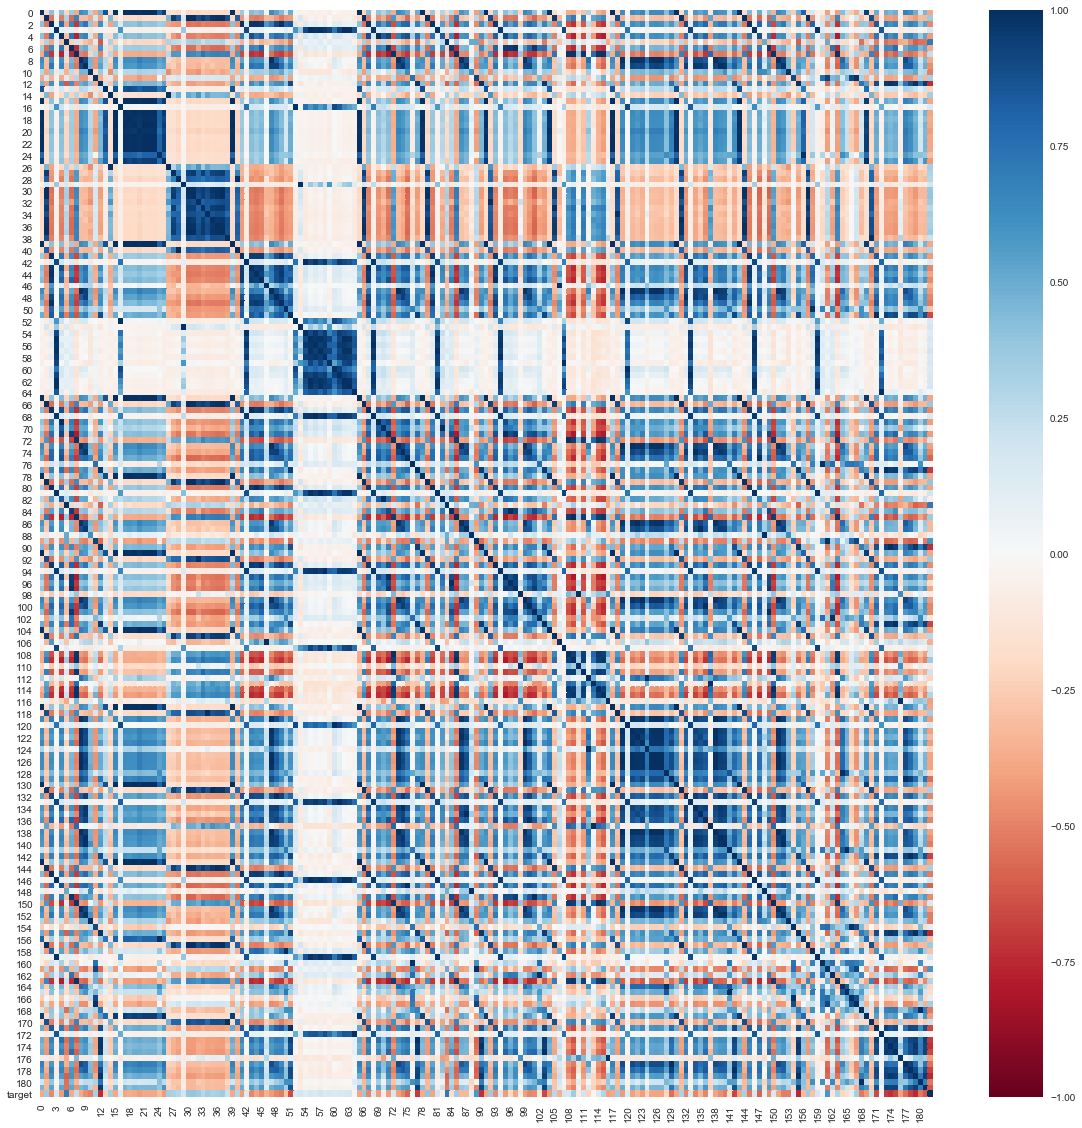

In [33]:
test = pd.DataFrame(data)
test['target'] = boston.target
corr = test.corr()
import seaborn as sns
plt.figure(figsize = (20, 20))
sns.heatmap(corr, vmin = -1, vmax = 1, cmap = 'RdBu') # 觀察特徵與目標之間的關聯性

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data, boston.target, test_size = 0.2, random_state = 4)

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
pred = reg.predict(x_test)
print(f'Linear Regression:')
print(f'coefficients: \n{reg.coef_}')
print(f'mean square error: {mean_squared_error(pred, y_test)}')
print(f'R square: {r2_score(pred, y_test)}\n')

lasso = linear_model.Lasso(alpha = 0.1)
lasso.fit(x_train, y_train)
pred = lasso.predict(x_test)
print(f'Lasso:')
print(f'coefficients: \n{lasso.coef_}')
print(f'mean square error: {mean_squared_error(pred, y_test)}')
print(f'R square: {r2_score(pred, y_test)}\n')

ridge = linear_model.Ridge(alpha = 0.1)
ridge.fit(x_train, y_train)
pred = ridge.predict(x_test)
print(f'Ridge:')
print(f'coefficients: \n{ridge.coef_}')
print(f'mean square error: {mean_squared_error(pred, y_test)}')
print(f'R square: {r2_score(pred, y_test)}')

Linear Regression:
coefficients: 
[ 3.32069592e+00  8.58057218e+00 -2.51332177e+01  1.41500611e+01
  1.30710231e+01  1.57513694e+01  2.94137866e+01 -8.83279542e+00
  3.95238750e+01 -1.64017849e+01  5.98364145e+00 -5.69521794e+00
  2.33142341e+00  9.40005037e-01  3.70396584e-01  5.24776038e+01
  8.60027052e-01 -3.86988888e+00  5.61196000e-01 -2.08134387e+00
 -1.20746848e+00  5.93080717e+01 -1.44004205e+02  3.45254931e+01
  3.29511928e-01  9.34695188e-01  3.70396584e-01 -1.94836385e-01
 -1.54315365e-01 -1.69671648e-01 -3.53501133e+00 -6.92753137e-01
  1.47057685e-01 -1.27224448e+00 -7.42160148e-01  2.13676255e+00
 -8.66983741e-01  1.33708953e+00 -6.88698488e-01  5.24776038e+01
 -1.54315365e-01  6.11776190e+00  5.82517592e-01  2.61323445e+00
  4.40019952e+00  1.04938201e+00  9.50772693e-01 -2.91281275e+00
  6.91457227e-01 -5.09915927e-01  2.79690490e+00 -2.47565687e+00
  8.60027052e-01 -1.69671648e-01  5.82517592e-01  1.41500611e+01
 -5.59897283e+00 -5.93371995e+00 -5.51137329e-01 -1.0775

### 測試不同正規化強度對系數的影響

### Lasso

In [7]:
alpha = np.array([1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1e-1, 1, 10, 100, 1000])
coef_ = np.empty((len(alpha), data.shape[1]))
train_score = np.empty((len(alpha)))
test_score = np.empty((len(alpha)))
for i in range(len(alpha)):
    lasso = linear_model.Lasso(alpha = alpha[i])
    lasso.fit(x_train, y_train)
    coef_[i, :] = lasso.coef_
    y_pred = lasso.predict(x_test)
    train_score[i] = mean_squared_error(lasso.predict(x_train), y_train)
    test_score[i] = mean_squared_error(lasso.predict(x_test), y_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1301.3778440663084, tolerance: 3.3131348787128716
  positive)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1301.3764738368645, tolerance: 3.3131348787128716
  positive)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1301.2393731998898, tolerance: 3.3131348787128716
  positive)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

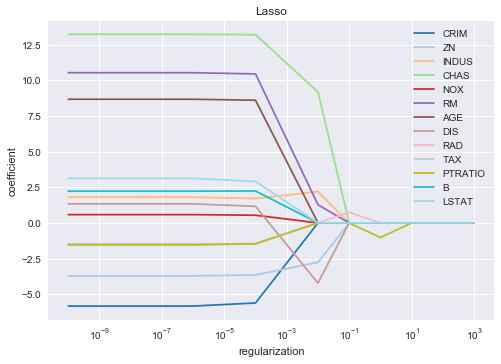

In [8]:
plt.style.use('seaborn')

number = len(boston.feature_names)
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1, number)]

for i in range(number):
    plt.plot(alpha, coef_[:, i], label = boston.feature_names[i], color = colors[i])
plt.title('Lasso')
plt.xlabel('regularization')
plt.ylabel('coefficient')
plt.xscale('log')
plt.legend()
plt.show()

#### 測試不同正規化強度下的訓練/測試誤差

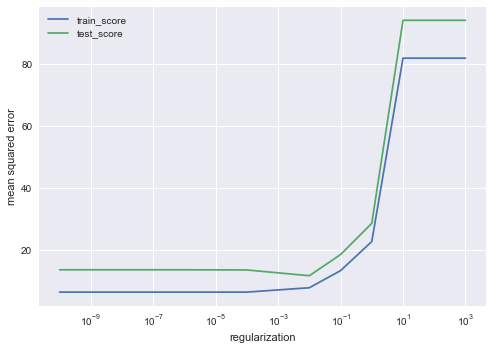

In [9]:
plt.plot(alpha, train_score, label = 'train_score')
plt.plot(alpha, test_score, label = 'test_score')
plt.xlabel('regularization')
plt.ylabel('mean squared error')
plt.xscale('log')
plt.legend()
plt.show()

### Ridge

In [10]:
alpha = np.array([1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1e-1, 1, 10, 100, 1000])
coef_ = np.empty((len(alpha), data.shape[1]))
train_score = np.empty((len(alpha)))
test_score = np.empty((len(alpha)))
for i in range(len(alpha)):
    ridge = linear_model.Ridge(alpha = alpha[i])
    ridge.fit(x_train, y_train)
    coef_[i, :] = ridge.coef_
    y_pred = ridge.predict(x_test)
    train_score[i] = mean_squared_error(ridge.predict(x_train), y_train)
    test_score[i] = mean_squared_error(ridge.predict(x_test), y_test)

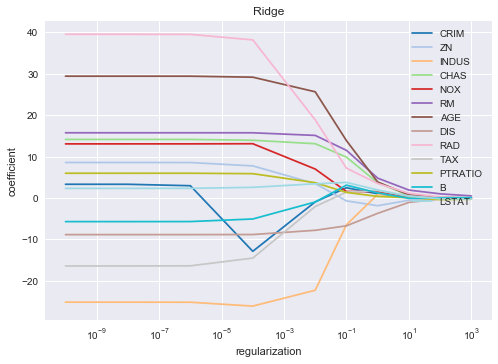

In [11]:
plt.style.use('seaborn')

number = len(boston.feature_names)
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1, number)]

for i in range(number):
    plt.plot(alpha, coef_[:, i], label = boston.feature_names[i], color = colors[i])
plt.title('Ridge')
plt.xlabel('regularization')
plt.ylabel('coefficient')
plt.xscale('log')
plt.legend(loc = 'upper right')
plt.show()

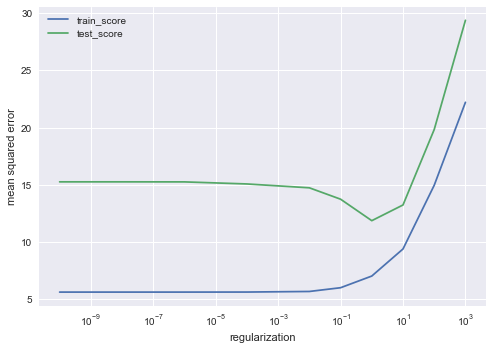

In [12]:
plt.plot(alpha, train_score, label = 'train_score')
plt.plot(alpha, test_score, label = 'test_score')
plt.xlabel('regularization')
plt.ylabel('mean squared error')
plt.xscale('log')
plt.legend()
plt.show()